In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('modified_data.csv')  # Replace 'your_dataset.csv' with your file path

In [4]:
X1 = data.drop(['Name','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10', 'Stress', 'Anxiety', 'Depression'], axis=1)
y1 = data['Stress']

In [5]:
X2 = data.drop(['Name','S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10', 'Stress', 'Anxiety', 'Depression'], axis=1)
y2 = data['Anxiety']

In [6]:
X3 = data.drop(['Name','S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10', 'Stress', 'Anxiety', 'Depression'], axis=1)
y3 = data['Depression']

**STRESS**

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4, random_state=42)
target = 'Stress'

**ANXIETY**

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.4, random_state=42)
target = 'Anxiety'

**DEPRESSION**

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.4, random_state=42)
target = 'Depression'

In [10]:
if target == 'Stress':
    X = X1
    y = y1
elif target == 'Anxiety':
    X = X2
    y = y2
elif target == 'Depression':
    X = X3
    y = y3

# Logistic Regression

In [11]:
# Create a Logistic Regression model
logistic_model = LogisticRegression(solver='saga',max_iter=4000)

# Train the model and make predictions (similar steps as mentioned in the previous code snippet)
# Fit the model
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy for {target}: {logistic_accuracy}")

Logistic Regression Accuracy for Depression: 0.9670103092783505


In [12]:
y_pred = logistic_predictions
model = logistic_model



# SVM

In [13]:
svm_model = SVC()

# Train the model and make predictions
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy for {target}: {svm_accuracy}")

SVM Accuracy for Depression: 0.9525773195876288


In [14]:
y_pred = svm_predictions
model = svm_model


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
forest_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
forest_model.fit(X_train, y_train)

# Make predictions
forest_predictions = forest_model.predict(X_test)

# Calculate accuracy
forest_accuracy = accuracy_score(y_test, forest_predictions)
print(f"Random Forest Accuracy for {target}: {forest_accuracy}")

Random Forest Accuracy for Depression: 0.8969072164948454


In [16]:
y_pred = forest_predictions
model = forest_model


# Decision Tree

In [17]:
# Create a Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the model and make predictions
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f"Decision Tree Accuracy for {target}: {tree_accuracy}")

Decision Tree Accuracy for Depression: 0.7608247422680412


In [18]:
y_pred = tree_predictions
model = tree_model

# Naive Bayes

In [19]:
# Create a Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model and make predictions
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print(f"Naive Bayes Accuracy for {target}: {naive_bayes_accuracy}")

Naive Bayes Accuracy for Depression: 0.9360824742268041


In [20]:
y_pred = naive_bayes_predictions
model = naive_bayes_model


# K-Nearest Neighbors 

In [21]:
# Create a KNN model
knn_model = KNeighborsClassifier()

# Train the model and make predictions
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors Accuracy for {target}: {knn_accuracy}")

K-Nearest Neighbors Accuracy for Depression: 0.8577319587628865


In [22]:
y_pred = knn_predictions
model = knn_model


**Metrics**

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Metrics for {target}:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}\n")


Metrics for Depression:
Accuracy: 0.8577319587628865
Precision: 0.8486238532110092
Recall: 0.8371040723981901
F1 Score: 0.8428246013667426
Confusion Matrix:
[[231  33]
 [ 36 185]]



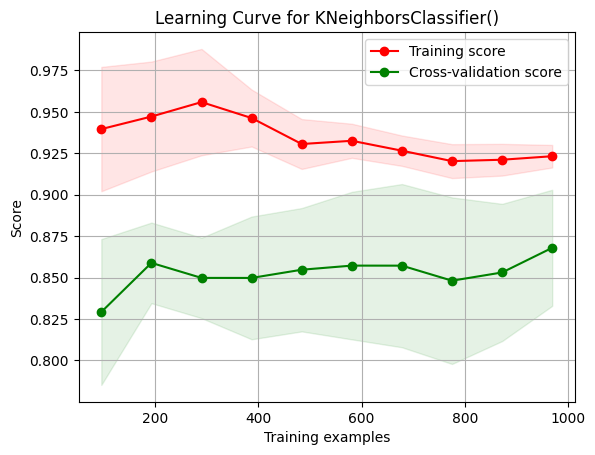

In [24]:
# Plot learning curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.title(f"Learning Curve for {model}")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.show()